<a href="https://colab.research.google.com/github/UniVR-DH/ADHLab/blob/main/lecture02_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimenting with Word Frequencies


<img src="https://drive.google.com/uc?export=view&id=1m_EMdnI5C826kgqK7r5vB4TXnB0-Wq7W" alt="Intestazione con loghi istituzionali" width="525"/>

| Docente      | Insegnamento | Anno Accademico    |
| :---        |    :----   |          ---: |
| Matteo Lissandrini      | Laboratorio Avanzato di Informatica Umanistica       | 2024/2025   |

## Usual install and basic imports

In [1]:
%pip install wikipedia-api

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.7.1-py3-none-any.whl size=14346 sha256=b30bba5d37a70d14eb85eb82867cd22423063fe50fc2a749478f6acbe16ae0f2
  Stored in directory: /root/.cache/pip/wheels/4c/96/18/b9201cc3e8b47b02b510460210cfd832ccf10c0c4dd0522962
Successfully built wikipedia-api


In [2]:
import math
import string
import numpy as np

import regex as re

import matplotlib.pyplot as plt

from collections import Counter

## Declare Wikipedia API Object to download pages

In [3]:
import wikipediaapi
# We use the  wikipediaapi to download pages from wikipeda
wapi_text = wikipediaapi.Wikipedia('MyProjectName (name@studenti.univr.it)',
                                   'en',
                                   extract_format=wikipediaapi.ExtractFormat.WIKI)

punct_regex = re.compile('[{}]'.format(re.escape(string.punctuation))) # Regex matching any punctuation
space_regex = re.compile(' +') # Regex matching whitespace

### Download a page, verify the properties of word frequencies

**Compare different pages and the same page in different languages**

In [4]:
page_py = wapi_text.page('New York City')
print("Page - Exists: %s" % page_py.exists())
print(page_py.text[:140])  #print first 140 characters
print(page_py.text[-140:])  #print last 140 characters

page_tokens = space_regex.sub(' ', punct_regex.sub(' ', page_py.text.lower())).strip().split()
print("Total words: ", len(page_tokens))
# Create the bag of words
page_bow = Counter(page_tokens)

print("Distinct words: ", len(page_bow))

Page - Exists: True
New York, often called New York City or NYC, is the most populous city in the United States, located at the southern tip of New York State o
 145,000 NYC photographs at the Museum of the City of New York
"The New New York Skyline (interactive)". National Geographic. November 2015.
Total words:  15800
Distinct words:  3393


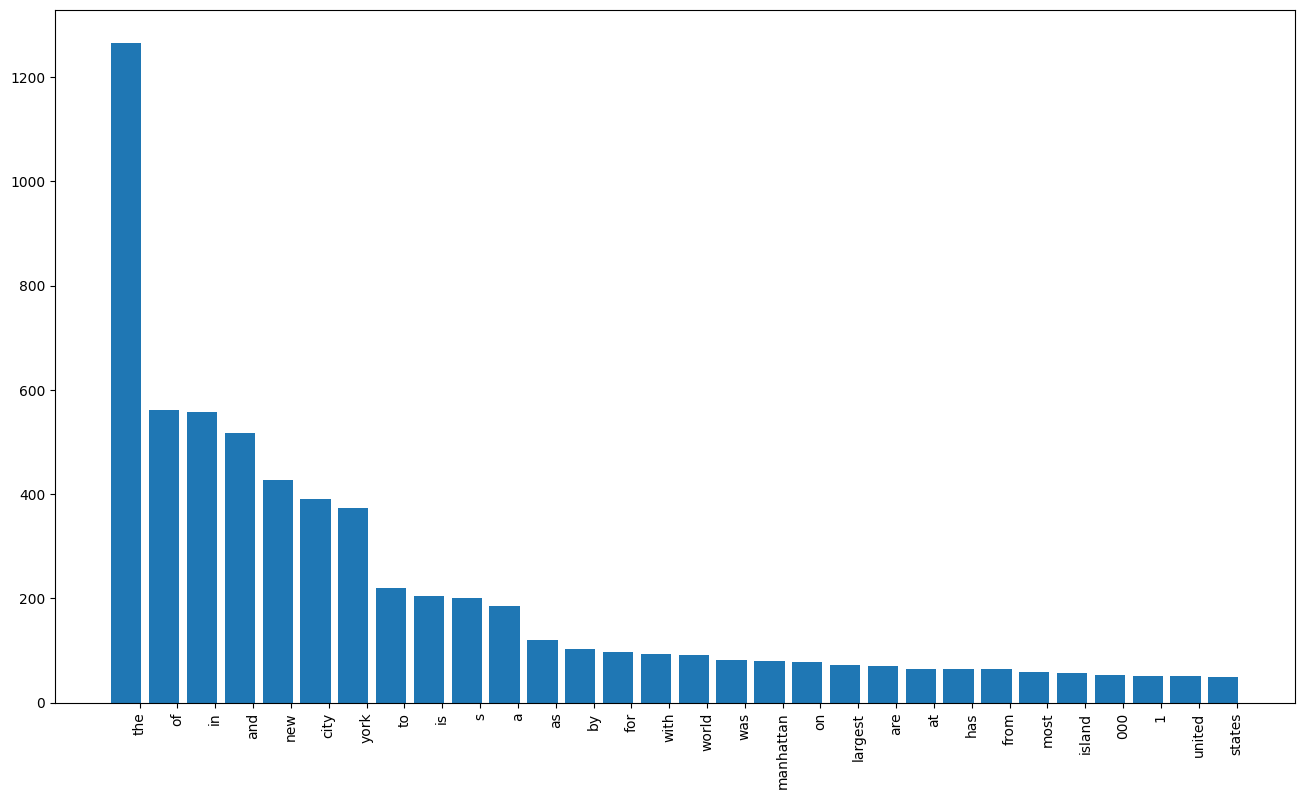

In [5]:
# Plot the histogram for the frequency of the most common words
words, counts = zip(*page_bow.most_common(30))
indexes = np.arange(len(words))

bar_width = 0.35

# Prepare figure with bars
plt.figure(figsize=(16,9))
plt.bar(indexes, counts)

# add labels
plt.xticks(indexes + bar_width, words, rotation=90)
plt.show()

In [6]:
# TODO: Try repeat the code above with a new page

## Find most common words across multiple pages


In [7]:
# Analyze NY
page_py1 = wapi_text.page('New York City')
page_tokens1 = space_regex.sub(' ', punct_regex.sub(' ', page_py1.text.lower())).strip().split()
print("Total words for 'New York City' ", len(page_tokens1))
page_bow1 = Counter(page_tokens1)
print(page_bow1.most_common(10))

# Analyze Botticelli
page_py2 = wapi_text.page('Sandro_Botticelli')
page_tokens2 = space_regex.sub(' ', punct_regex.sub(' ', page_py2.text.lower())).strip().split()
print("Total words for 'Sandro_Botticelli ", len(page_tokens2))
page_bow2 = Counter(page_tokens2)
print(page_bow2.most_common(10))

#TODO: Analyze another page



#TODO Find the words that appear in top-50 most commons in all pages



Total words for 'New York City'  15800
[('the', 1266), ('of', 562), ('in', 558), ('and', 517), ('new', 428), ('city', 391), ('york', 374), ('to', 219), ('is', 204), ('s', 200)]
Total words for 'Sandro_Botticelli  8759
[('the', 601), ('of', 363), ('in', 248), ('and', 230), ('a', 207), ('to', 152), ('botticelli', 147), ('his', 129), ('was', 103), ('s', 94)]
